In [41]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [42]:
ksi = pd.read_csv('KSI.csv')
ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

In [43]:
# Split Date
ksi['DATE'] = pd.to_datetime(ksi['DATE'])
ksi['YEAR_S'] = ksi['DATE'].dt.year
ksi['MONTH_S'] = ksi['DATE'].dt.month
ksi['DAY_S'] = ksi['DATE'].dt.day

In [44]:
# Combine Latitude and Longitude
ksi['NEW_LATITUDE'] = ksi['LATITUDE'].round(2)
ksi['NEW_LONGITUDE'] = ksi['LONGITUDE'].round(2)
ksi['Combine_Lat_Long'] = ksi['NEW_LATITUDE'].astype(str) + ", " +  ksi['NEW_LONGITUDE'].astype(str)

In [45]:
# Reduce LIGHT category
ksi['LIGHT'] = np.where(ksi['LIGHT']=='Dark, artificial', 'Dark', ksi['LIGHT'])
ksi['LIGHT'] = np.where(ksi['LIGHT']=='Dawn, artificial', 'Dawn', ksi['LIGHT'])
ksi['LIGHT'] = np.where(ksi['LIGHT']=='Daylight, artificial', 'Daylight', ksi['LIGHT'])
ksi['LIGHT'] = np.where(ksi['LIGHT']=='Dusk, artificial', 'Dusk', ksi['LIGHT'])

In [46]:
# Update Accident Class to 0 (non-Fatal) and 1 (Fatal)
ksi['ACCLASS'] = np.where(ksi['ACCLASS']=='Property Damage Only', '0', ksi['ACCLASS'])
ksi['ACCLASS'] = np.where(ksi['ACCLASS']=='Non-Fatal Injury', '0', ksi['ACCLASS'])
ksi['ACCLASS'] = np.where(ksi['ACCLASS']=='Fatal', '1', ksi['ACCLASS'])
ksi.groupby('ACCLASS')['ACCNUM'].nunique()

ACCLASS
0    5196
1     806
Name: ACCNUM, dtype: int64

In [47]:
ksi

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,YEAR_S,MONTH_S,DAY_S,NEW_LATITUDE,NEW_LONGITUDE,Combine_Lat_Long
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006-03-11 05:00:00+00:00,852,8,BLOOR ST W,DUNDAS ST W,...,D11,88,High Park North (88),1,2006,3,11,43.66,-79.45,"43.66, -79.45"
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006-03-11 05:00:00+00:00,852,8,BLOOR ST W,DUNDAS ST W,...,D11,88,High Park North (88),2,2006,3,11,43.66,-79.45,"43.66, -79.45"
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006-03-11 05:00:00+00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,D42,131,Rouge (131),3,2006,3,11,43.80,-79.20,"43.8, -79.2"
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006-03-11 05:00:00+00:00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,D42,131,Rouge (131),4,2006,3,11,43.80,-79.20,"43.8, -79.2"
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006-03-12 05:00:00+00:00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,D41,138,Eglinton East (138),5,2006,3,12,43.73,-79.26,"43.73, -79.26"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,-8.820837e+06,5.421411e+06,81509784,1636966,2020,2020-08-30 04:00:00+00:00,1340,13,BRIMLEY RD,BARKDENE HILLS,...,D41,123,Cliffcrest (123),16856,2020,8,30,43.71,-79.24,"43.71, -79.24"
16856,-8.820068e+06,5.425334e+06,81505452,1650701,2020,2020-09-01 04:00:00+00:00,1205,12,EGLINTON AVE E,BELLAMY RD N,...,D43,138,Eglinton East (138),16857,2020,9,1,43.74,-79.23,"43.74, -79.23"
16857,-8.820068e+06,5.425334e+06,81505453,1650701,2020,2020-09-01 04:00:00+00:00,1205,12,EGLINTON AVE E,BELLAMY RD N,...,D43,138,Eglinton East (138),16858,2020,9,1,43.74,-79.23,"43.74, -79.23"
16858,-8.820068e+06,5.425334e+06,81505454,1650701,2020,2020-09-01 04:00:00+00:00,1205,12,EGLINTON AVE E,BELLAMY RD N,...,D43,138,Eglinton East (138),16859,2020,9,1,43.74,-79.23,"43.74, -79.23"


In [48]:
acc_num = ksi['ACCNUM'].unique()
len(acc_num)

6002

In [49]:
ksi['DISTRICT'] = np.where(ksi['DISTRICT']=='Toronto East York', 'Toronto and East York', ksi['DISTRICT'])
district_count = ksi.groupby('DISTRICT')['ACCNUM'].nunique()
district_count.sort_values(ascending=False)

DISTRICT
Toronto and East York    2065
Etobicoke York           1373
Scarborough              1317
North York               1185
<Null>                     62
Name: ACCNUM, dtype: int64

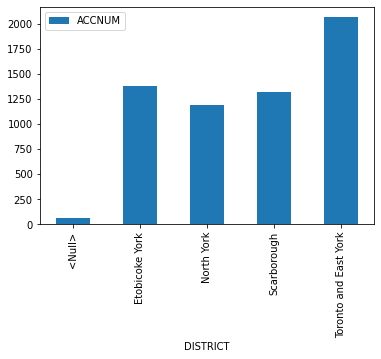

In [50]:
# Top 3 Districts
# 1)	Toronto and East York
# 2)	Etobicoke York
# 3)	Scarborough
district_count.plot(kind='bar', legend=True)

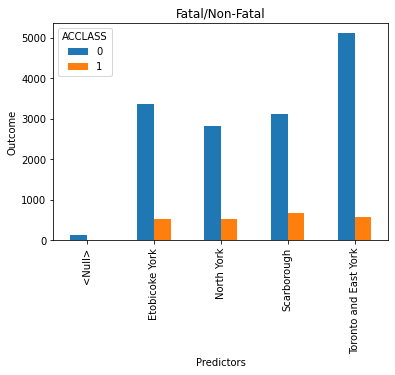

In [51]:
pd.crosstab(ksi.DISTRICT, ksi.ACCLASS).plot(kind='bar')
plt.title('Fatal/Non-Fatal')
plt.xlabel('Predictors')
plt.ylabel('Outcome')
plt.savefig('pur_fre_pout_bar')

In [52]:
hood_count = ksi.groupby('NEIGHBOURHOOD')['ACCNUM'].nunique()
hood_count.sort_values(ascending=False)

NEIGHBOURHOOD
Waterfront Communities-The Island (77)    222
West Humber-Clairville (1)                170
Bay Street Corridor (76)                  141
Rouge (131)                               132
Woburn (137)                              120
                                         ... 
Guildwood (140)                            10
Lawrence Park North (105)                  10
Playter Estates-Danforth (67)              10
Maple Leaf (29)                             7
Lambton Baby Point (114)                    4
Name: ACCNUM, Length: 140, dtype: int64

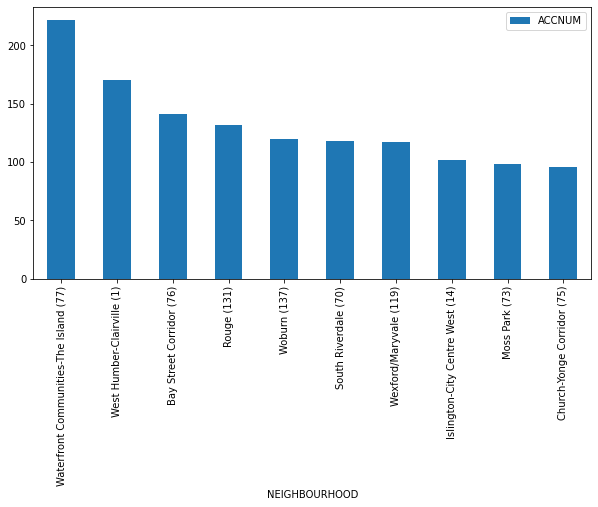

In [53]:
# Top 3 Neighbourhoods
# 1)	77 – Waterfront Communities-The Island (43.63-65, -79.34-40)
# 2)	1 – West Humber-Clairville (43.66-75, -79.55-63)
# 3)	76 – Bay Street Corridor (43.64-66, -79.37-39)
hood_count.sort_values(ascending=False)[:10].plot(kind='bar', legend=True, figsize=[10,5])

In [54]:
ksi['LOCATION'] = ksi['STREET1'].str.cat(ksi['STREET2'], sep=', ')
loc_count = ksi.groupby('LOCATION')['ACCNUM'].nunique()
loc_count.sort_values(ascending=False).head(10)

LOCATION
FINCH AVE W, WESTON RD                    8
EGLINTON AVE E, VICTORIA PARK AVE         7
LAKE SHORE BLVD W, BRITISH COLUMBIA RD    7
DIXON RD, ISLINGTON AVE                   7
DUNDAS ST W, BLOOR ST W                   7
FINCH AVE W, DRIFTWOOD AVE                6
LAWRENCE AVE E, MCCOWAN RD                6
EGLINTON AVE E, BRIMLEY RD                6
WARDEN AVE, HUNTINGWOOD DR                6
QUEENS QUAY W, YORK ST                    6
Name: ACCNUM, dtype: int64

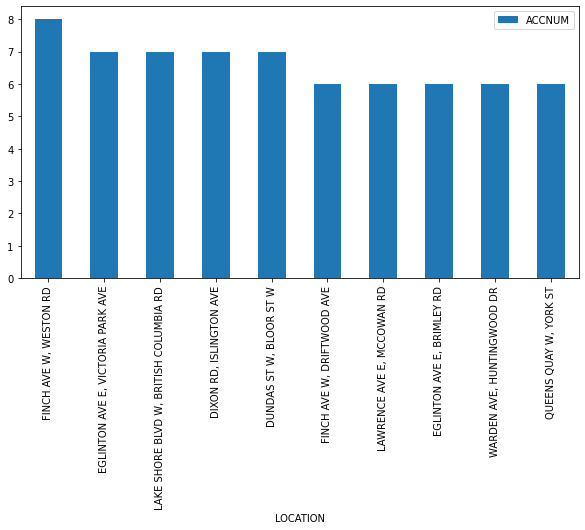

In [55]:
# Top 5 Intersection (by street)
# 1) FINCH AVE W, WESTON RD (43.75, -79.54)
# 2) EGLINTON AVE E, VICTORIA PARK AVE (43.72, -79.30)
# 2) LAKE SHORE BLVD W, BRITISH COLUMBIA RD (43.62/63, -79.42)
# 2) DIXON RD, ISLINGTON AVE (43.69, -79.54)
# 2) DUNDAS ST W, BLOOR ST W (43.65, -79.45)

loc_count.sort_values(ascending=False)[:10].plot(kind='bar', legend=True, figsize=[10,5])